# check oof df

In [1]:
import os

import numpy as np
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
test_df = pd.read_parquet("/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet")

In [4]:
test_df.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [5]:
test_df.tail()

,series_id,step,timestamp,anglez,enmo
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328
449,0402a003dae9,149,2018-12-18T12:57:25-0500,7.029900,0.0081


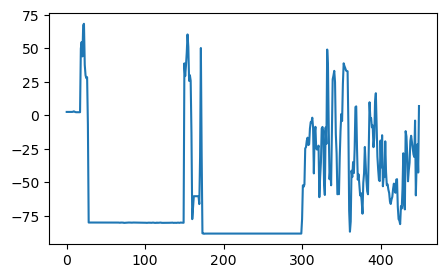

In [11]:
plt.figure(figsize=(5, 3))
plt.plot(test_df["anglez"])
plt.show()

In [7]:
one_test = test_df[test_df["series_id"]=="0402a003dae9"]

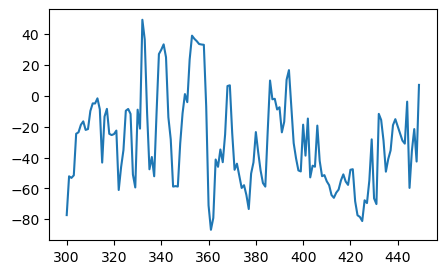

In [12]:
plt.figure(figsize=(5, 3))
plt.plot(one_test["anglez"])
plt.show()

In [9]:
sub_train_df = pd.read_csv("/kaggle/working/submission/submission.csv")

In [13]:
import sys
sys.path.append("/kaggle/src/dss_utils")
from dss_metrics import score

In [14]:
train_event_df = pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv")

In [15]:
score(train_event_df, sub_train_df)

0.46701465019582156

In [17]:
# nullがないeventだけを抽出
train_event_df = train_event_df[train_event_df["step"].notnull()]
print(score(train_event_df, sub_train_df))

0.7072553483248613
